In [19]:
from keras.applications.vgg16 import preprocess_input

from keras.applications.vgg16 import VGG16
from keras.models import Model

import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import cv2 as cv
from PIL import Image

import os
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
path = '/Users/michal/Documents/studia/sem4/WdUM/Galaxies_Clusterization/data/images'
os.chdir(path)
extenstions = {}

with os.scandir(path) as files:
    for file in files:
        filename, ext = os.path.splitext(file.name)
        if ext not in extenstions:
            extenstions[ext] = [filename]
        else:
            extenstions[ext].append(filename)

print(extenstions.keys())

dict_keys(['.jpg', '', '.txt'])


In [45]:
print(extenstions[''])
print(extenstions['.txt'])

['z']
['results', 'results_public']


In [50]:
!wc -l results.txt
!wc -l results_public.txt

   59979 results.txt
   19992 results_public.txt


In [46]:
galaxies = []

with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.jpg'):
            galaxies.append(file.name)

In [31]:
print(galaxies[:10])

['9733.jpg', '110369.jpg', '14147.jpg', '86425.jpg', '52112.jpg', '108526.jpg', '222363.jpg', '139923.jpg', '89716.jpg', '63.jpg']


In [ ]:
heights = set()
widths = set()

for galaxy in galaxies[:10000]:
    with Image.open(galaxy) as img:
        width, height = img.size
        heights.add(height)
        widths.add(width)

print(f'Heights: {heights}')
print(f'Widths: {widths}')

Heights: {424}
Widths: {424}


All images have the same size: 424 x 424

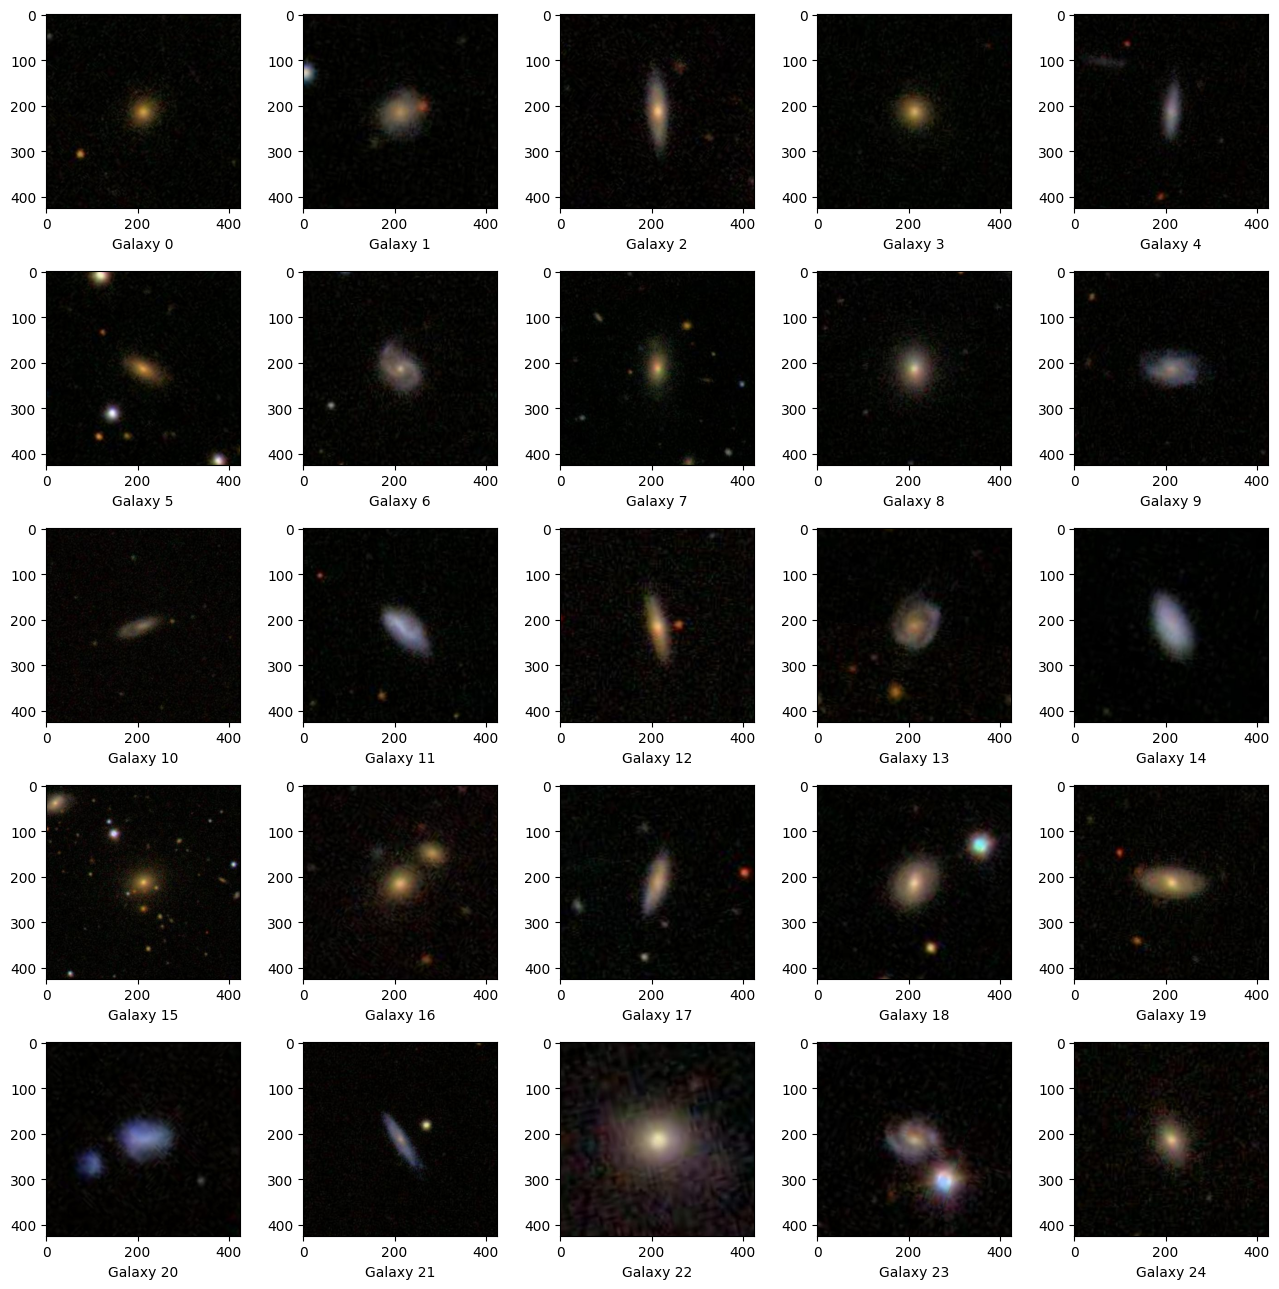

In [33]:
def show_galaxies(rand = False):
    figure, axes = plt.subplots(nrows=5,ncols=5,figsize=(13,13))
    for i, ax in enumerate(axes.flat):
        indx = random.randint(0, len(galaxies) - 1) if rand else i
        img = plt.imread(galaxies[indx])
        ax.imshow(img)
        ax.set_xlabel(f'Galaxy {indx}')
    plt.tight_layout()
    plt.show()

show_galaxies() # Set rand = True to explore random galaxies

Galaxies are located in the center of the image, so we will cut them.

In [56]:
def show_galaxy(n, cut = True):
    img = plt.imread(galaxies[n])
    if cut:
        img = img[110:310,110:310]
    plt.xlabel(f'Galaxy {n}')
    plt.imshow(img)

Before cutting

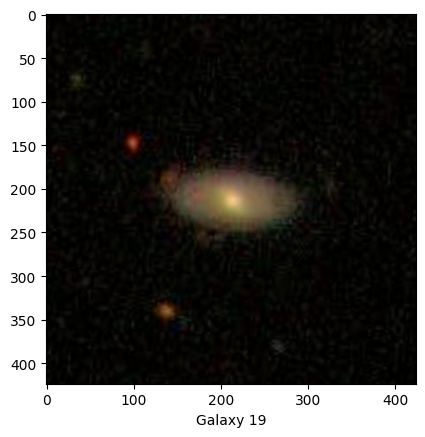

In [57]:
show_galaxy(19, False)

After cutting

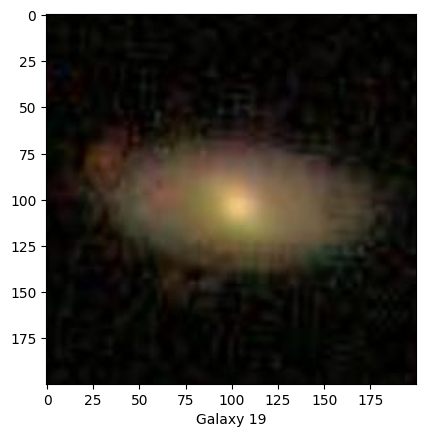

In [58]:
show_galaxy(19)

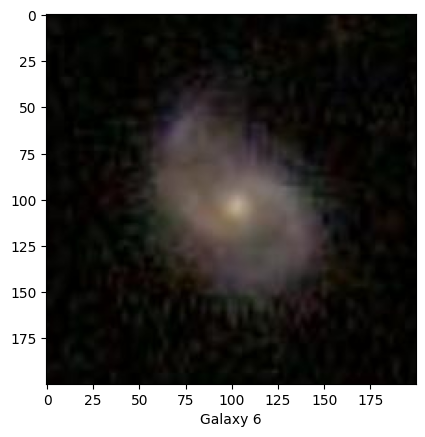

In [59]:
show_galaxy(6)

In [49]:
def binary_threshold(n):
    img = cv.imread(galaxies[n])
    cut_img = img[110:310,110:310]
    _,Thresh_IMG = cv.threshold(cut_img, 90, 255, cv.THRESH_BINARY)
    plt.xlabel(f'Galaxy {n}')
    plt.imshow(Thresh_IMG, cmap="Greys_r")

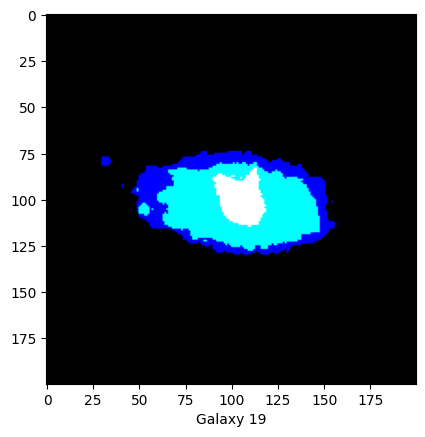

In [50]:
binary_threshold(19)

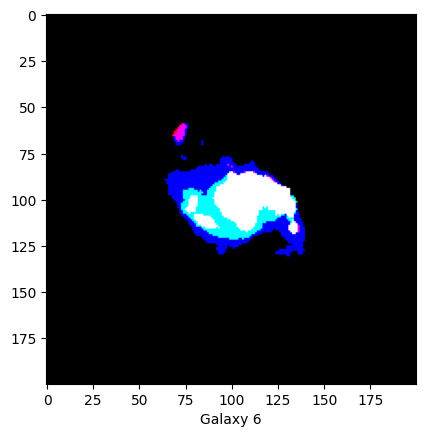

In [51]:
binary_threshold(6)

In [55]:
def find_contour(n):
    img = cv.imread(galaxies[n])
    cut_img = img[110:310,110:310]
    canny_img = cv.Canny(cut_img, 5, 80)
    contour,_ = cv.findContours(canny_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    draw_contour = cv.drawContours(canny_img, contour, -1, (255,0,0), 1)
    plt.xlabel(f'Galaxy {n}')
    plt.imshow(draw_contour)

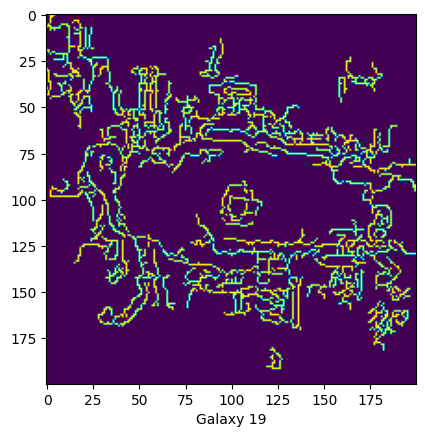

In [56]:
find_contour(19)

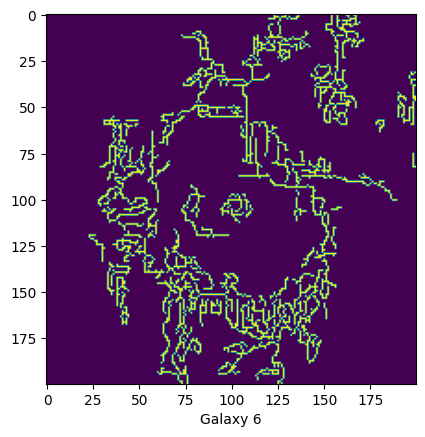

In [57]:
find_contour(6)

In [61]:
def show_diff(n):
    img = cv.imread(galaxies[n])
    cut_img = img[120:300,110:310]
    _, thresh_img = cv.threshold(cut_img, 90, 255, cv.THRESH_BINARY)
    diff_img = cv.absdiff(cut_img, thresh_img)

    plt.xlabel(f'Galaxy {n}')
    plt.imshow(diff_img)

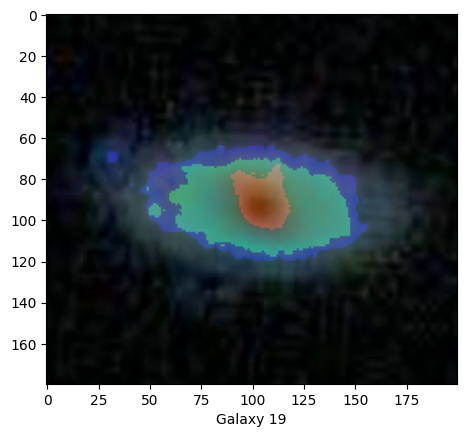

In [62]:
show_diff(19)

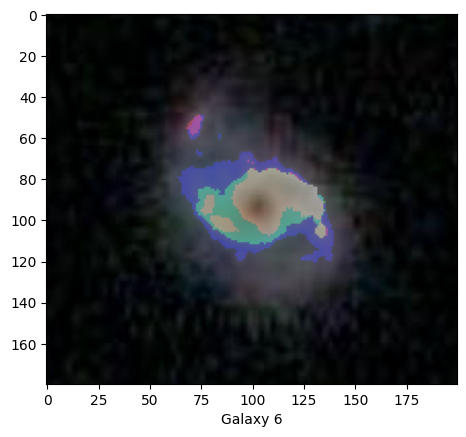

In [63]:
show_diff(6)

In [7]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [8]:
from keras.preprocessing.image import load_img 

def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx)
    
    return features

In [16]:
data = {}

"""for galaxy in galaxies:
    feat = extract_features(galaxy, model)
    data[galaxy] = feat"""

for galaxy in galaxies[:1000]:
    feat = extract_features(galaxy, model)
    data[galaxy] = feat        

filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))
feat.shape

feat = feat.reshape(-1,4096)
feat.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

(1000, 4096)

In [17]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [26]:
groups = {} # cluster_id : images
for file, cluster in zip(filenames, kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [27]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 222 to 30
Clipping cluster size from 362 to 30
Clipping cluster size from 416 to 30


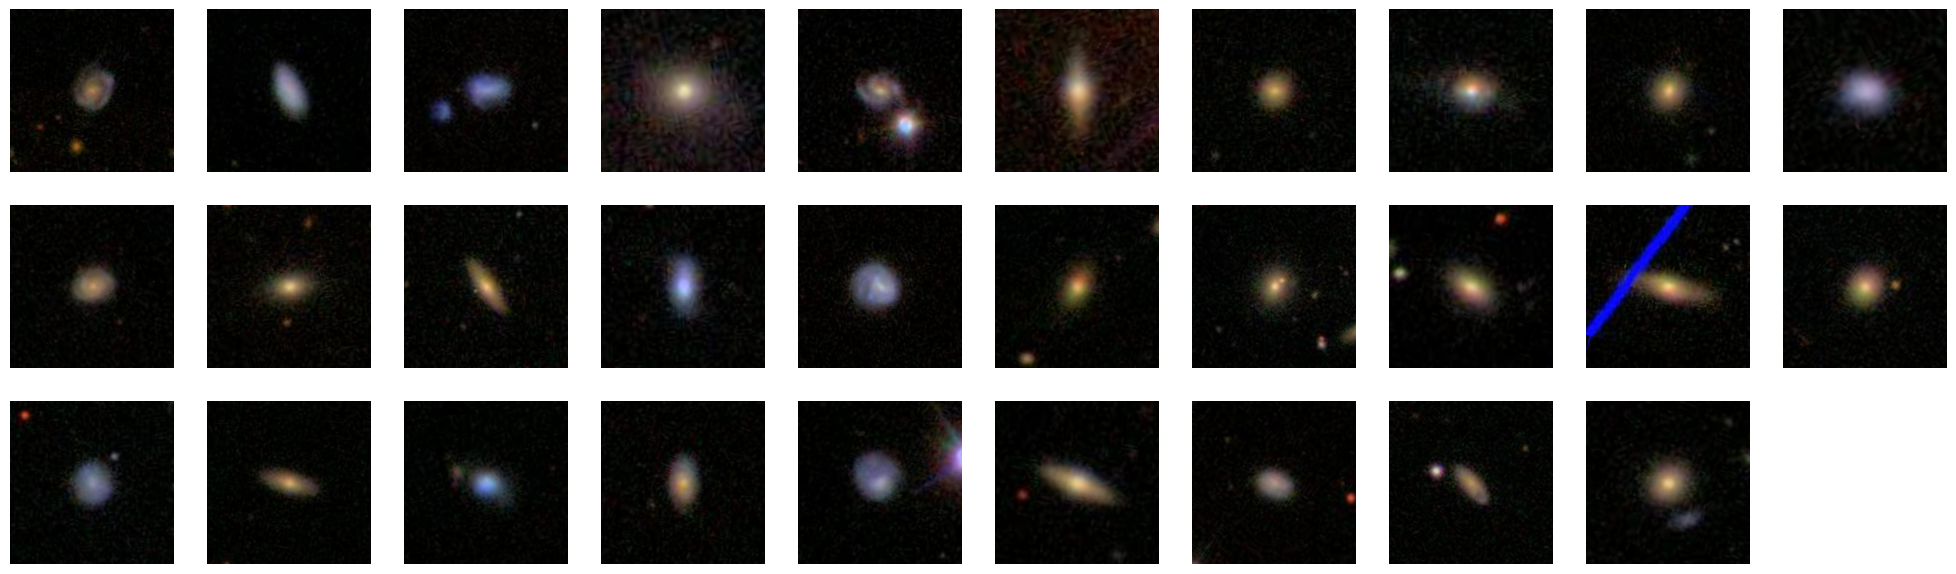

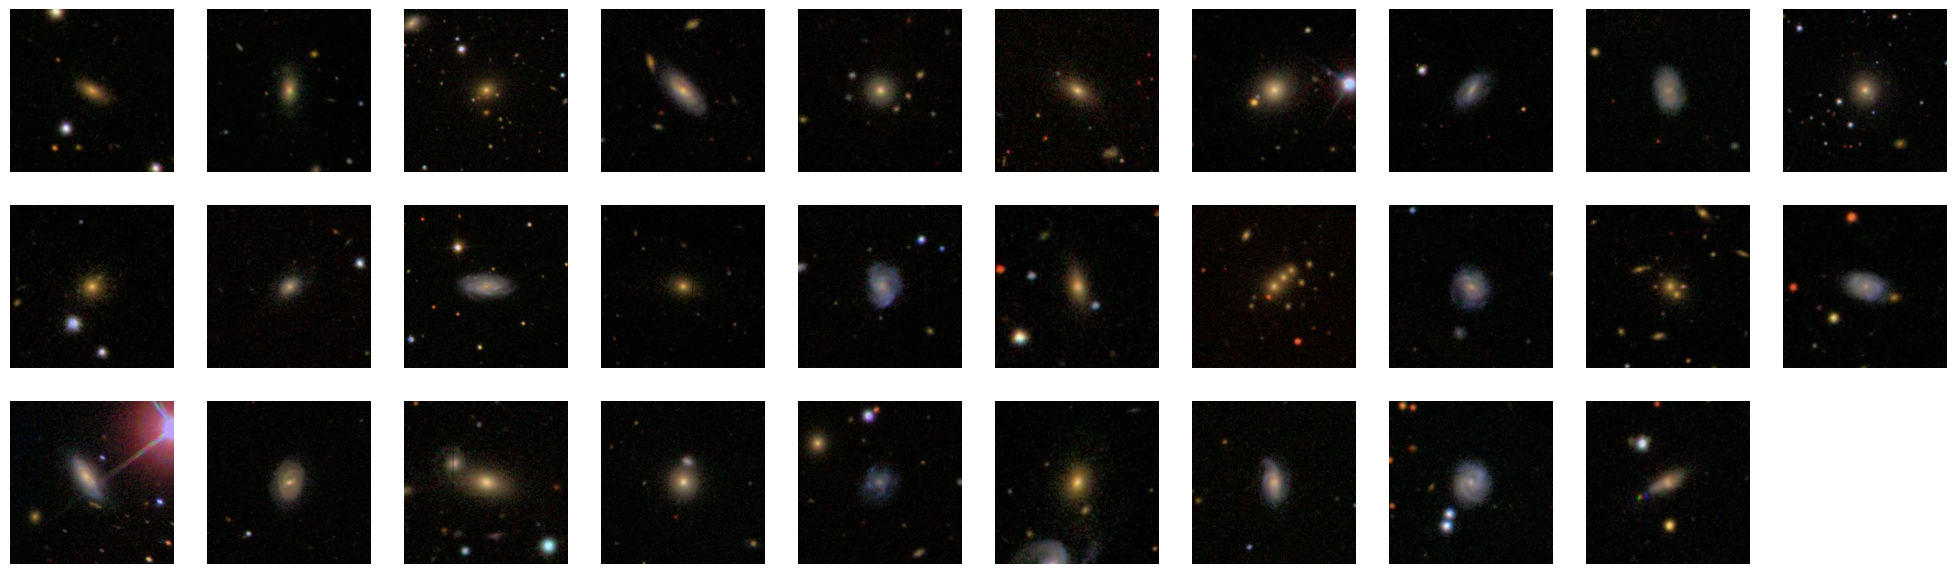

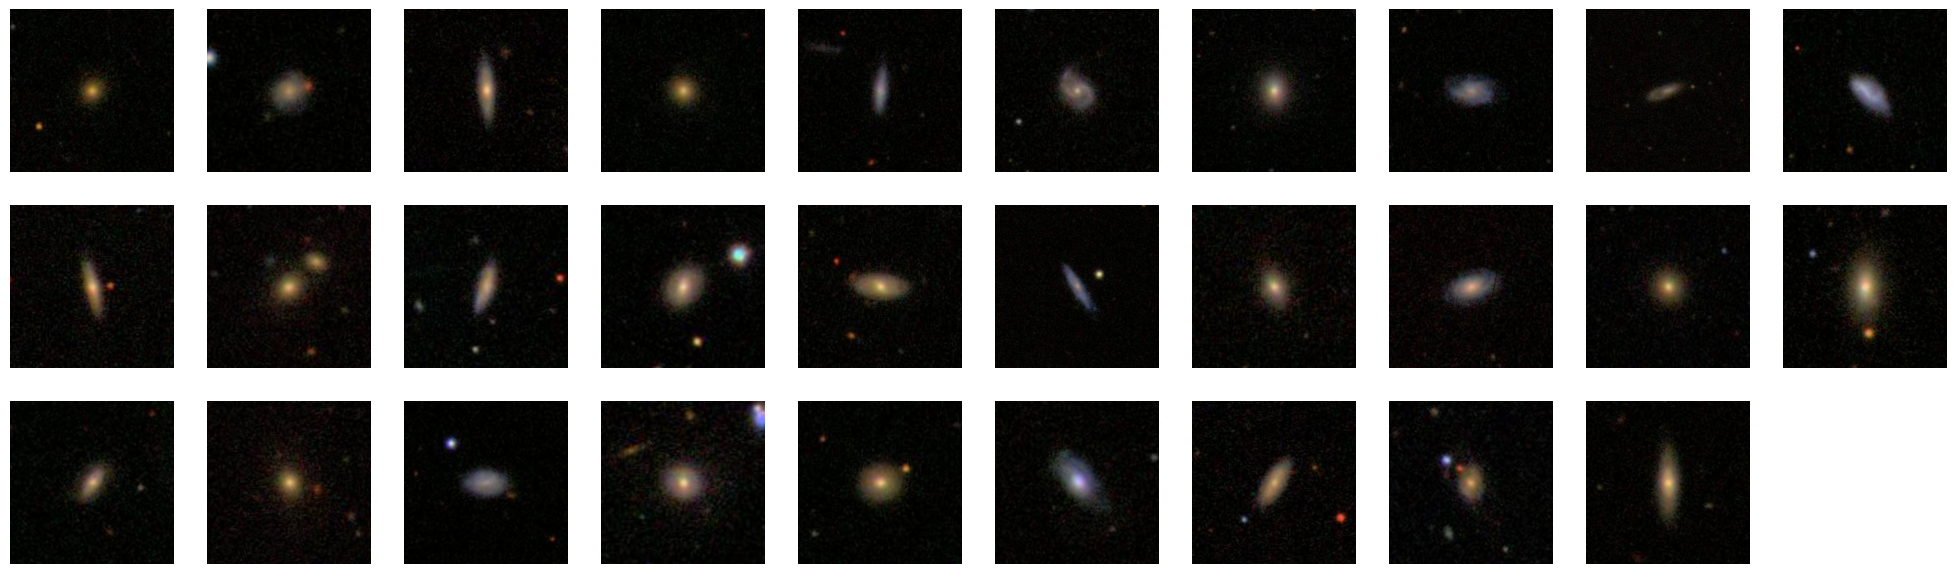

In [28]:
view_cluster(0)
view_cluster(1)
view_cluster(2)